<a href="https://www.kaggle.com/code/sjagkoo7/titanic-survival-prediction?scriptVersionId=178388410" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Titanic Survival Prediction
Given a custom dataset which represents the details of passengers who were in the great 'Titanic' ship.

Our task is to find whether a person survived or not after the incident using various models provided by `scikit-learn`.

Your aim is to get the predictions using different models by tuning the parameters of your choice.

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns
import sklearn # machine learninng modelling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicdataset-traincsv/train.csv


# Reading the Dataset

In [2]:
titanic=pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv')

In [3]:
# first three rows of train dataset
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Exploring the Dataset

In [4]:
# Summary of dataset
def summary(titanic):
    df=pd.DataFrame(index=titanic.columns)
    df['dtypes']=titanic.dtypes
    df['count']=titanic.count()
    df['#unique']=titanic.nunique()
    df['missing']=titanic.isna().sum()
    df['missing%'] = titanic.isna().sum()/len(titanic)*100
    df = pd.concat([df,(titanic.describe().T.drop('count',axis=1))],axis=1)
    return df

In [5]:
summary(titanic).style.background_gradient(cmap='YlGnBu')

,dtypes,count,#unique,missing,missing%,mean,std,min,25%,50%,75%,max
PassengerId,int64,891,891,0,0.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,int64,891,2,0,0.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,int64,891,3,0,0.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Name,object,891,891,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Sex,object,891,2,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Age,float64,714,88,177,19.865320,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,int64,891,7,0,0.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,int64,891,7,0,0.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Ticket,object,891,681,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Fare,float64,891,248,0,0.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color: #20BEFF;
              font-size: 100%;
              font-family: Verdana"> 
    
<b>Insight:</b>
* We have numerical and  categorical columns
* Missing Values: The dataset contains NA values, null values handling  will be required .
* Outcome: Target variable is  "Survived" variable. Possibilities include: lived(1), died(0).

In [6]:
#  dataset - displaying rows if any have duplicate rows
titanic_duplicated_rows=titanic[titanic.duplicated()]
titanic_duplicated_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<div style = "color: White; display: fill;
              border-radius: 5px;
              background-color:  #20BEFF;
              font-size: 100%;
              font-family: Verdana">
    
* There is no duplicated rows in dataset

In [7]:
#titanic dataset - displaying rows if any have null rows
titanic[titanic.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
# Get the count of all null values in each column present in the dataframe df and store it in a list named null_vals.
null_vals=titanic.isna().sum().values.tolist()
null_vals

[0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 687, 2]

In [9]:
# Handle the  null values of Age , Embarked and Cabin column
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic[['Cabin','Embarked']]= titanic[['Cabin','Embarked']].ffill()

In [10]:
# Get the count of all null values in each column present in the dataframe df and store it in a list named null_vals_after.
null_vals_after=titanic.isna().sum().values.tolist()
null_vals_after

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [11]:
titanic=titanic.dropna()

In [12]:
# Get the count of all null values in each column present in the dataframe df and store it in a list named null_vals_after.
null_vals_after=titanic.isna().sum().values.tolist()
null_vals_after

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [13]:
# Dataset Attributes Description
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #20BEFF; font-size:100%; text-align:left">

<h3 align="left"><font color='#d79190'>💡 Dataset Attributes Description:</font></h3>

<table border="1" cellpadding="5" cellspacing="0">
    <thead>
        <tr>
            <th>Attribute</th>
            <th>Description</th>
            <th>Values</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>PassengerId</td>
            <td>ID Number of  Passenger</td>
            <td>Numeric ID</td>
        </tr>
        <tr>
            <td>Survived</td>
            <td>Passenger Died or Lived</td>
            <td>1 = Lived, 0 = Died</td>
        </tr>
        <tr>
            <td>Pclass</td>
            <td>Passenger Onboarded Class</td>
            <td>1 = First Class , 2 = Second Class , 3 = Third Class</td>
        </tr>
        <tr>
            <td>Name</td>
            <td>Name of the Passenger</td>
            <td>Passenger Name</td>
        </tr>
        <tr>
            <td>Sex</td>
            <td>Gender of the Passenger</td>
            <td>0 = Male , 1 = Female</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>Age of the Passenger</td>
            <td>Numeric</td>
        </tr>
        <tr>
            <td>SibSp</td>
            <td>Number of siblings or spouses traveling</td>
            <td>SibSp Numbers</td>
        </tr>
        <tr>
            <td>Parch</td>
            <td>Number of parents or children traveling</td>
            <td>Parch Numbers</td>
        </tr>
        <tr>
            <td>Ticket</td>
            <td>Ticket ID of the Passenger</td>
            <td>Alphanumeric</td>
        </tr>
        <tr>
            <td>Fare</td>
            <td>Cost of the Ticket</td>
            <td>Numeric</td>
        </tr>
        <tr>
            <td>Cabin</td>
            <td>Cabin ID</td>
            <td>Alphanumeric</td>
        </tr>
        <tr>
            <td>Embarked</td>
            <td>the port where the passenger embarked the ship (e.g., Southampton, Cherbourg, Queenstown)</td>
            <td>Southampton(S), Cherbourg(C), Queenstown(Q)</td>
        </tr>
    </tbody>
</table>

</div>

# Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


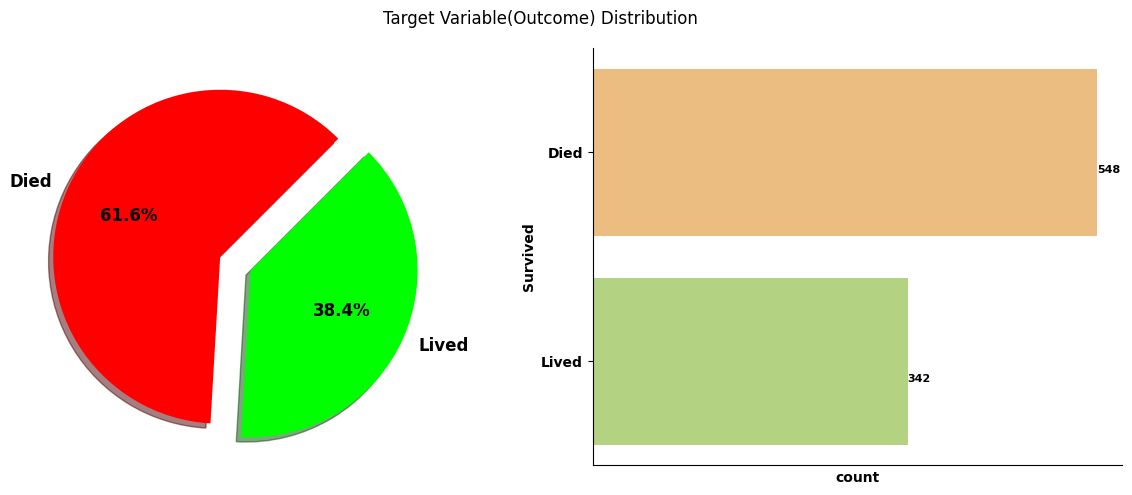

In [14]:
# Target variable distribution
fig,ax=plt.subplots(1,2,figsize=(12,5))

# ax[0] means first columns -- ax[0][0]
# ax[1] means second columns -- ax[0][1]

ax[0].pie(titanic.Survived.value_counts(),
          explode=[0.0,0.2],startangle= 45,
          shadow=True,colors=['#FF0000', '#00FF00'],
          autopct='%.1f%%',labels=['Died','Lived'],
          textprops={'fontsize': 12, 'weight': 'bold'}
         )

# explode -- to make slice in pie graph and array value represent the distance between one slice to another
# startangle -- to rotate slice
# shadow -- to create shadow of graph i.e. back image

x=titanic.Survived.value_counts()
y=['Died','Lived']
sns.barplot(x=x,y=y,ax=ax[1],palette='RdYlGn')

plt.setp(ax[1].get_yticklabels(),fontweight="bold")# get_yticklabels will fetch the yticklabels the setup will set again with bold changes
plt.setp(ax[1].get_xticklabels(),fontweight="bold")# get_xticklabels will fetch the yticklabels the setup will set again with bold changes

ax[1].set_xlabel('count',fontweight="bold") # set x label
ax[1].set_ylabel('Survived',fontweight="bold") # set x label

ax[1].spines['top'].set_visible(False) # it will remove the top boundry line
ax[1].spines['right'].set_visible(False) # it will remove the right boundry line

# it will remove the x-axis tick and label
ax[1].tick_params(
        axis='x',
        which='both',
        bottom=False,
        labelbottom=False
        )

val_count=titanic.Survived.value_counts()
for i,v in enumerate(val_count):
    ax[1].text(v,i+0.1,str(v), fontdict={'fontsize':8,'fontweight':'bold'})
# text --  is a function to add text to the graph
# v, i+0.1 -- These are the x and y coordinates where the text will be placed. v is the value from the s1 array, and i+0.1 adds a small vertical offset to position the text slightly above the corresponding bar in the chart.
# str(v) -- is the text 

fig.suptitle('Target Variable(Outcome) Distribution')
plt.tight_layout()
plt.show()

In [15]:
# splitting categroical and continuous variables

# unique value counts for each column
unique_count=titanic.nunique()

# unique count to distinguish between categroical and continuous
max_unique=3

cat_cols=unique_count[unique_count.values<=max_unique].index.to_list()
cont_cols=unique_count[unique_count.values>max_unique].index.to_list()

# As Survived is target variable hence removing from the cat_cols list
if 'Survived' in cat_cols:
    cat_cols.remove('Survived')

#remove name,ticket and cabin from cont_cols
remove = ['Name','Cabin','Ticket']
for i in range (len(remove)):
    if remove[i] in cont_cols:
        cont_cols.remove(remove[i])

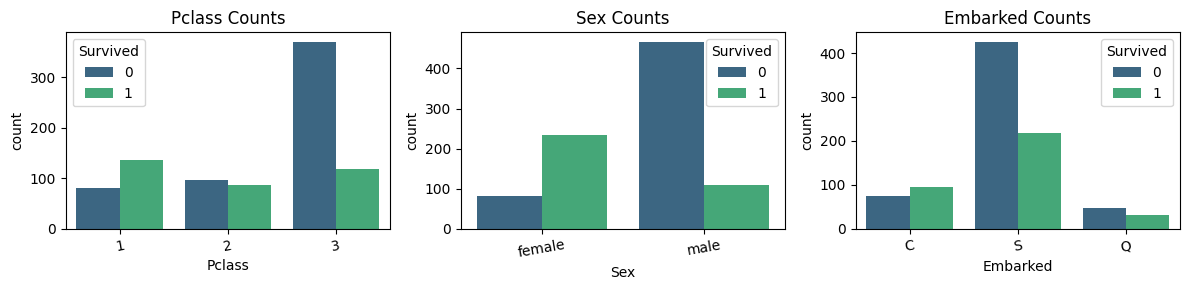

In [16]:
# Categorical Variable Distribution
def cat_distribution(df,cols,n_cols,hue):
    '''
    # Function to plot countplot for categorical varaible distribution
    df: titanic dataset
    columns: category variables
    n_cols: num of cols
    '''
    n_rows=len(cols)//n_cols
    fig,ax=plt.subplots(n_rows,n_cols,figsize=(12,3*n_rows))
    ax=ax.flatten()  # Convert the ax array into a 1D array. means it converts ax 2-D array (1,3) into 1-D array to avoid issues.
    for i,column in enumerate(cols):
        sns.countplot(data=df,x=column,hue=hue,ax=ax[i],palette='viridis')
        ax[i].set_title(f'{column} Counts',fontsize=12)
        ax[i].tick_params(axis='x',rotation=10)
    
    plt.tight_layout() 
    plt.show()

cat_distribution(titanic,cat_cols,3,'Survived')

#### Observations :
* Passenger `Pclass - 3 , Male ` and onboarded at `	Southampton` died most.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

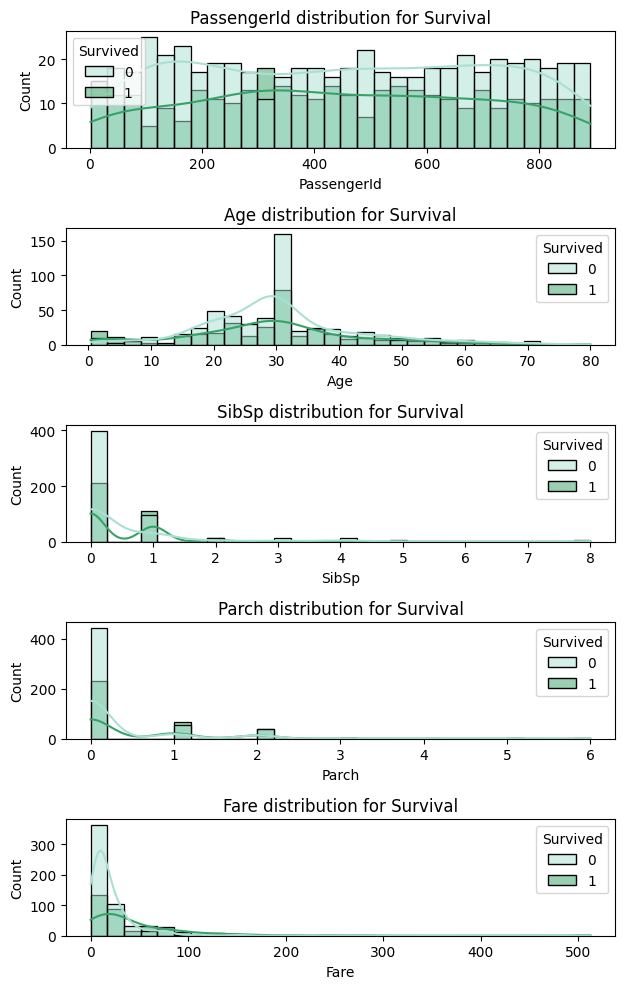

In [17]:
# Continuous Variable Distribution
plt.figure(figsize=(12,2*len(cont_cols)))

for idx,column in enumerate(cont_cols):
    plt.subplot(len(cont_cols),2,idx*2+1)
    sns.histplot(data=titanic,x=column,hue='Survived',bins=30,kde=True,palette='BuGn')
    plt.title(f'{column} distribution for Survival')
    
plt.tight_layout()
plt.show()

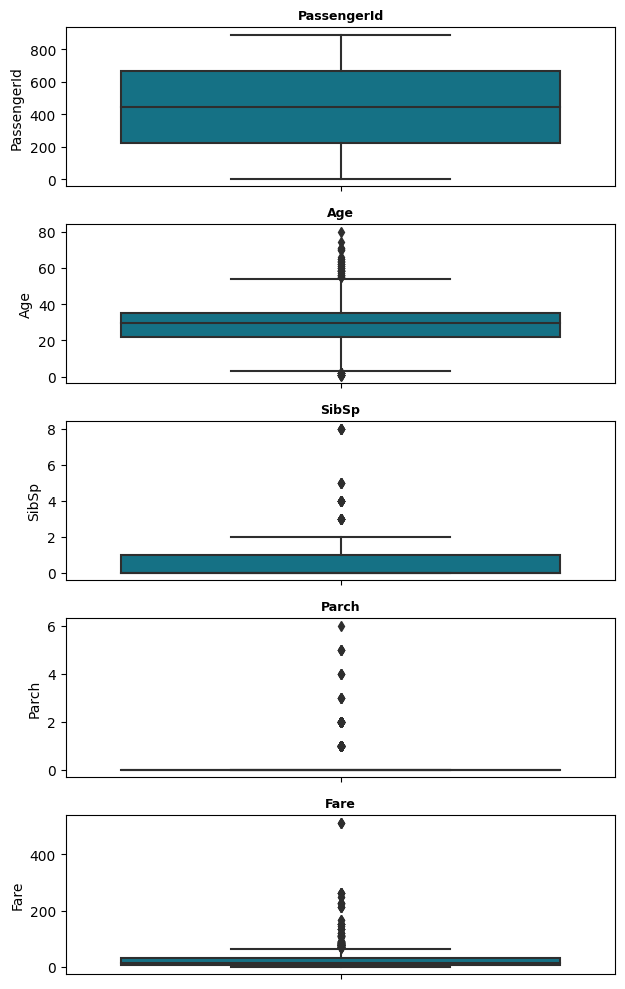

In [18]:
# Continuous Variable Distribution with Outlier Check
plt.figure(figsize=(12,2*len(cont_cols)))

for idx,col in enumerate(cont_cols):
    plt.subplot(len(cont_cols),2,idx*2+1)
    sns.boxplot(data=titanic,y=col,color='#037d97')
    plt.set_xlabel=''
    plt.set_ylabel=''
    plt.title(f'{col}',fontdict={'fontweight':'bold','fontsize':9})
    
plt.tight_layout()
plt.show()

#### Observations :
* Passenger `Age,No of Siblings,Number of Parents and Fare` have got outliers.

# Feature Encoding

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 1 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    int64  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    float64
 10  Cabin        890 non-null    object 
 11  Embarked     890 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.4+ KB


#### Observations :
* ['name','Sex','Ticket','Cabin','Embarked'] -- all these are object tpe feature and  could be categorical column.
* name -- it is just strings
* Ticket -- it is also just string 
* Cabin -- can play role in deciding whether survied or not.However, there are 78% cabin details are missing.

In [20]:

# Label encode categorical columns
from sklearn.preprocessing import LabelEncoder
def feature_encoding(df,cols):
    for col in cols:
        le=LabelEncoder()# as you label encoding handle one column at a time hence loop used to do label encoding for all features
        df[col]=le.fit_transform(df[col])
    return df
    



In [21]:
cols=['Sex','Embarked']
titanic=feature_encoding(titanic,cols)

In [22]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,C85,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2


In [23]:
# dropping the ['PassengerId','Name','Ticket','Cabin'] , as these are just details.
titanic=titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [24]:
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2


# Co-Relation

In [25]:
# co - relation matrix table
corr=titanic.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.337996,-0.543053,-0.070372,-0.034955,0.081248,0.256987,-0.172298
Pclass,-0.337996,1.000000,0.131305,-0.330981,0.082720,0.018893,-0.549322,0.167980
Sex,-0.543053,0.131305,1.000000,0.084687,-0.115037,-0.245202,-0.181998,0.113375
Age,-0.070372,-0.330981,0.084687,1.000000,-0.232407,-0.179564,0.091263,-0.031645
SibSp,-0.034955,0.082720,-0.115037,-0.232407,1.000000,0.415164,0.159935,0.069846
Parch,0.081248,0.018893,-0.245202,-0.179564,0.415164,1.000000,0.216015,0.042059
Fare,0.256987,-0.549322,-0.181998,0.091263,0.159935,0.216015,1.000000,-0.228108
Embarked,-0.172298,0.167980,0.113375,-0.031645,0.069846,0.042059,-0.228108,1.000000


In [26]:
def heatmap(corr):
    mask = np.zeros_like(corr) #create the same shape as the correlation matrix (corr) but is filled with zeros
    mask[np.triu_indices_from(mask)] = True #This line fills the upper triangle of the mask array with True values. This is done to mask out the upper triangle of the correlation matrix in the heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(data=corr,annot=True, fmt='.2f',cmap='viridis',mask=mask,annot_kws={"size": 6},linewidths=.5)#annot_kws={"size": 6} -- it will help to set the fontsize of annotation
    plt.title('Titanic Dataset Co-Relation Matrix\n',fontdict={'fontweight':'bold','fontsize':12})
    

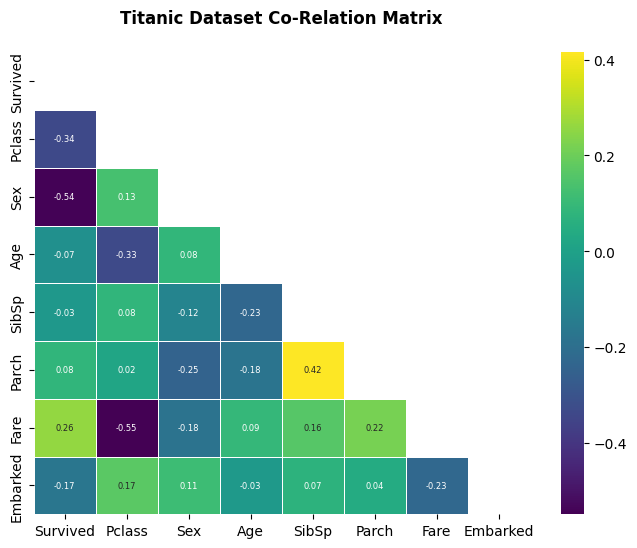

In [27]:
heatmap(corr)

# Feature Scaling

In [28]:
def feature_scaling(df,cols):
    scaler = MinMaxScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    return df

In [29]:
from sklearn.preprocessing import MinMaxScaler
numerical_features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
titanic=feature_scaling(titanic,numerical_features)

In [30]:
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0
2,1,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0
3,1,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0


# Base Model

In [31]:
# spliiting dataset in train and test set 
from sklearn.model_selection import train_test_split
# Model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#model selection
from sklearn.model_selection import KFold
#metrics
from sklearn.metrics import accuracy_score,f1_score

In [32]:
#splitting input feature and traget variable
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [33]:
# splitting  dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X=X_train.copy()
y=y_train.copy()
test=X_test.copy()
y_test_org=y_test.copy()

In [34]:
gaussnb_cv_scores = list()
svc_cv_scores = list()
knc_cv_scores = list()

kf=KFold(n_splits=5,shuffle=True,random_state=42)

for idx,(train_idx,test_idx) in enumerate(kf.split(X,y)):
    X_train,X_test=X.iloc[train_idx],X.iloc[test_idx]
    y_train,y_test=y.iloc[train_idx],y.iloc[test_idx]
    
    
    print('---------------------------------------------------------------')
    
    #Cross Validation
    
    #GaussianNB
    gaussnb_md = GaussianNB()
    gaussnb_md.fit(X_train, y_train)
    gaussnb_pred = gaussnb_md.predict(X_test)   
    gaussnb_f1 = f1_score(y_test, gaussnb_pred, average = 'binary') 
    print('Fold', idx+1, '==> GaussianNB oof F1 score is ==>', gaussnb_f1)
    gaussnb_cv_scores.append(gaussnb_f1)
    
    #svc
    svc_md = SVC(kernel='rbf',gamma='scale',random_state=32)
    svc_md.fit(X_train, y_train)
    svc_pred = svc_md.predict(X_test)   
    svc_f1 = f1_score(y_test, svc_pred, average = 'binary') 
    print('Fold', idx+1, '==> SVC oof F1 score is ==>', svc_f1)
    svc_cv_scores.append(svc_f1)
    
    #KNeighborsClassifier
    knc_md = KNeighborsClassifier(n_neighbors=5,algorithm='auto', leaf_size=30)
    knc_md.fit(X_train, y_train)
    knc_pred = knc_md.predict(X_test)   
    knc_f1 = f1_score(y_test, knc_pred, average = 'binary') 
    print('Fold', idx+1, '==> KNeighborsClassifier oof F1 score is ==>', knc_f1)
    knc_cv_scores.append(knc_f1)

    
print('---------------------------------------------------------------')
print('Average Accuracy of GaussianNB model is:', np.mean(gaussnb_cv_scores))
print('Average Accuracy of SVC model is:', np.mean(svc_cv_scores))
print('Average Accuracy of KNeighborsClassifier model is:', np.mean(knc_cv_scores))

---------------------------------------------------------------
Fold 1 ==> GaussianNB oof F1 score is ==> 0.7567567567567567
Fold 1 ==> SVC oof F1 score is ==> 0.7755102040816326
Fold 1 ==> KNeighborsClassifier oof F1 score is ==> 0.7924528301886793
---------------------------------------------------------------
Fold 2 ==> GaussianNB oof F1 score is ==> 0.7037037037037038
Fold 2 ==> SVC oof F1 score is ==> 0.7311827956989247
Fold 2 ==> KNeighborsClassifier oof F1 score is ==> 0.7169811320754716
---------------------------------------------------------------
Fold 3 ==> GaussianNB oof F1 score is ==> 0.6990291262135924
Fold 3 ==> SVC oof F1 score is ==> 0.6741573033707865
Fold 3 ==> KNeighborsClassifier oof F1 score is ==> 0.7142857142857143
---------------------------------------------------------------
Fold 4 ==> GaussianNB oof F1 score is ==> 0.7272727272727273
Fold 4 ==> SVC oof F1 score is ==> 0.6947368421052632
Fold 4 ==> KNeighborsClassifier oof F1 score is ==> 0.7047619047619047


In [35]:
#Pipline 
#Hyper Parameter
#Feature Importance